

---



### Importing Pandas and Numpy for Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree

### Reading Data

In [2]:
url='https://raw.githubusercontent.com/IntellectualCoders/Minor-project/master/FinalData.csv'
df=pd.read_csv(url)

In [3]:
df

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective,Alloted Elective,Marks In Alloted Elective,CGPA
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,SVV,SVV,91.0,88.6
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,CC,CC,60.0,87.1
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,CS,CS,90.0,86.9
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,IOT,IOT,58.0,67.4
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,ML,ML,60.0,88.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing NaN values from Data

In [5]:
print(df.shape)
df.dropna(inplace=True,how='any')
print(df.shape)

(2944, 15)
(2944, 15)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 2943
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_ID                 2944 non-null   object 
 1   CP                         2944 non-null   float64
 2   DSA                        2944 non-null   float64
 3   DBMS                       2944 non-null   float64
 4   MP                         2944 non-null   float64
 5   COA                        2944 non-null   float64
 6   SE                         2944 non-null   float64
 7   CNS                        2944 non-null   float64
 8   OS                         2944 non-null   float64
 9   WEBDEV                     2944 non-null   float64
 10  AUTOMATA                   2944 non-null   float64
 11  Preference Of Elective     2944 non-null   object 
 12  Alloted Elective           2944 non-null   object 
 13  Marks In Alloted Elective  2944 non-null   float

In [7]:
df['Preference Of Elective'].unique()

array(['SVV', 'CC', 'CS', 'IOT', 'ML', 'NLP', 'AR_VR'], dtype=object)

In [8]:
df.groupby(['Preference Of Elective']).mean()

,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Marks In Alloted Elective,CGPA
Preference Of Elective,,,,,,,,,,,,
AR_VR,70.128146,70.086957,68.894737,71.155606,69.791762,68.487414,67.078261,70.302059,70.485126,68.913043,68.389016,69.532311
CC,70.984848,70.259259,69.787879,70.195286,70.577441,69.952862,69.955387,69.161616,69.016835,68.279461,68.727273,69.817088
CS,69.095855,69.514249,69.766839,70.365285,68.117876,69.722798,68.331347,69.389896,69.871762,69.277202,69.194301,69.345311
IOT,69.200658,69.434211,70.447368,71.078947,69.552632,68.335526,70.159868,68.625000,69.276316,68.016447,68.944079,69.412697
ML,69.347140,70.222880,70.554241,69.398422,69.635108,69.520710,69.056914,69.984221,68.285996,68.930966,69.550296,69.493660
NLP,71.427673,69.610063,70.716981,69.522013,70.125786,68.811321,70.440252,67.817610,69.993711,70.276730,70.723270,69.874214
SVV,69.555556,70.128655,69.046784,68.865497,70.573099,70.064327,69.926316,68.602339,72.116959,70.953216,71.298246,69.983275


### Data manipulation converting categorical data into dummy variables

In [9]:
pref = pd.get_dummies(df['Preference Of Elective'])
alc = pd.get_dummies(df['Alloted Elective'])

In [10]:
pref

,AR_VR,CC,CS,IOT,ML,NLP,SVV
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
2939,0,0,0,0,1,0,0
2940,0,1,0,0,0,0,0
2941,0,0,1,0,0,0,0
2942,0,0,0,0,0,1,0


In [11]:
alc

,AR_VR,CC,CS,IOT,ML,NLP,SVV
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
2939,0,0,0,0,0,0,1
2940,0,0,0,0,0,0,1
2941,0,0,0,0,0,0,1
2942,0,0,0,0,0,1,0


In [12]:
df1 = pd.concat([df,alc],ignore_index=False,axis=1,verify_integrity=False)

In [13]:
df1.shape

(2944, 22)

### Renaming Colums for Better Understanding

In [14]:
df1.rename(columns={'AR_VR':'A_AR_VR','CC':'A_CC','CS':'A_CS','IOT':'A_IOT','ML':'A_ML','NLP':"A_NLP",'SVV':"A_SVV"},inplace=True)

In [15]:
df1

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,...,Alloted Elective,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,...,SVV,91.0,88.6,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,...,CC,60.0,87.1,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,...,CS,90.0,86.9,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,...,IOT,58.0,67.4,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,...,ML,60.0,88.6,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,...,SVV,71.0,52.0,0,0,0,0,0,0,1
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,...,SVV,45.0,50.6,0,0,0,0,0,0,1
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,...,SVV,92.0,50.1,0,0,0,0,0,0,1
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,...,NLP,84.0,69.4,0,0,0,0,0,1,0


In [16]:
df2 = pd.concat([df1,pref],axis=1)

In [17]:
df2.drop(['Preference Of Elective','Alloted Elective'],axis=1,inplace=True)

In [18]:
df2.shape

(2944, 27)

In [19]:
df2.columns

Index(['Student_ID', 'CP', 'DSA', 'DBMS', 'MP', 'COA', 'SE', 'CNS', 'OS',
       'WEBDEV', 'AUTOMATA', 'Marks In Alloted Elective', 'CGPA', 'A_AR_VR',
       'A_CC', 'A_CS', 'A_IOT', 'A_ML', 'A_NLP', 'A_SVV', 'AR_VR', 'CC', 'CS',
       'IOT', 'ML', 'NLP', 'SVV'],
      dtype='object')

In [20]:
df2.rename(columns={'AR_VR':"P_AR_VR",'CC':"P_CC",'CS':"P_CS",'IOT':"P_IOT",'ML':"P_ML",'NLP':"P_NLP",'SVV':"P_SVV"},inplace=True)

In [21]:
df2


,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,...,A_ML,A_NLP,A_SVV,P_AR_VR,P_CC,P_CS,P_IOT,P_ML,P_NLP,P_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,...,0,0,1,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,...,0,0,0,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,...,0,0,0,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,...,0,0,0,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,...,0,0,1,0,0,0,0,1,0,0
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,...,0,0,1,0,1,0,0,0,0,0
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,...,0,0,1,0,0,1,0,0,0,0
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,...,0,1,0,0,0,0,0,0,1,0




---



## Data Visualization

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
cols= list(df2.columns.values)

In [25]:
df1['Alloted Elective'] = pd.Categorical(pd.factorize(df1['Alloted Elective'])[0] + 1)
df1['Preference Of Elective'] = pd.Categorical(pd.factorize(df1['Preference Of Elective'])[0] + 1)
df1

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,...,Alloted Elective,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,...,1,91.0,88.6,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,...,2,60.0,87.1,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,...,3,90.0,86.9,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,...,4,58.0,67.4,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,...,5,60.0,88.6,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,...,1,71.0,52.0,0,0,0,0,0,0,1
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,...,1,45.0,50.6,0,0,0,0,0,0,1
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,...,1,92.0,50.1,0,0,0,0,0,0,1
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,...,6,84.0,69.4,0,0,0,0,0,1,0


In [26]:
df_visual = df1[cols[1:11]]
df_visual

,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA
0,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0
1,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0
2,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0
3,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0
4,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0
...,...,...,...,...,...,...,...,...,...,...
2939,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0
2940,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0
2941,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0
2942,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0


In [27]:
principalComponents = pca.fit_transform(df_visual)

In [28]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2 '])
allotelect = pd.Categorical(pd.factorize(df1['Alloted Elective'])[0] + 1)
prefelect = pd.Categorical(pd.factorize(df1['Preference Of Elective'])[0] + 1)
df12= pd.DataFrame(data= prefelect, columns=['hue2'])
df11= pd.DataFrame(data = allotelect, columns=['hue'])
df11

,hue
0,1
1,2
2,3
3,4
4,5
...,...
2939,1
2940,1
2941,1
2942,6


In [29]:
principal_Df = pd.concat([principal_Df,df11,df12],axis=1)

In [30]:
principal_Df.tail()

,principal component 1,principal component 2,hue,hue2
2939,0.700420,-9.213964,1,5
2940,-12.073518,17.491054,1,2
2941,12.296817,-3.408235,1,3
2942,-10.181429,21.679597,6,6
2943,29.312413,-4.894352,6,6


In [31]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.11189313 0.10624528]


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='principal component 1'>

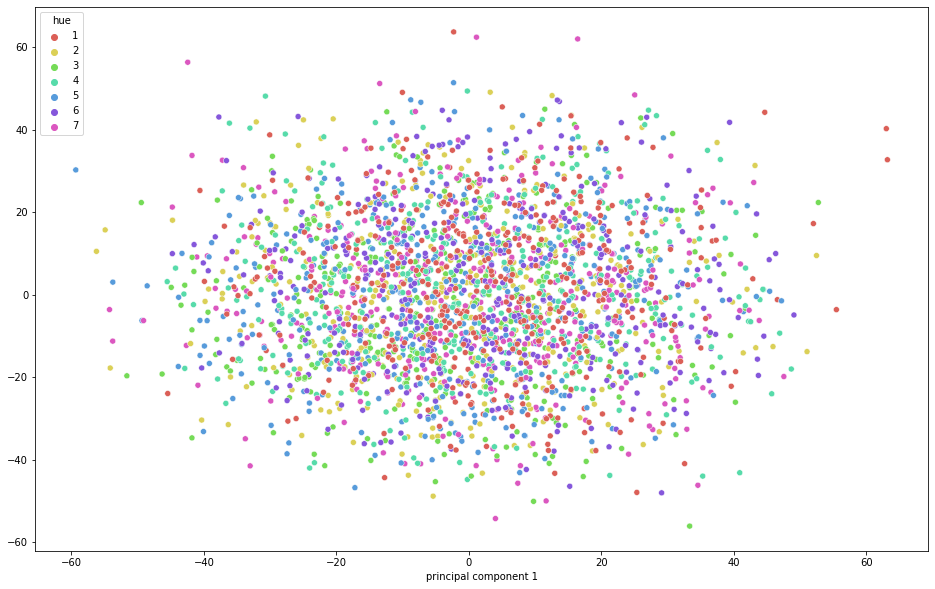

In [33]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1',
    y=principalComponents[:,1],
    palette=sns.color_palette("hls", 7),
    hue = 'hue',
    data = principal_Df,
    legend="full"
)

<AxesSubplot:xlabel='principal component 1'>

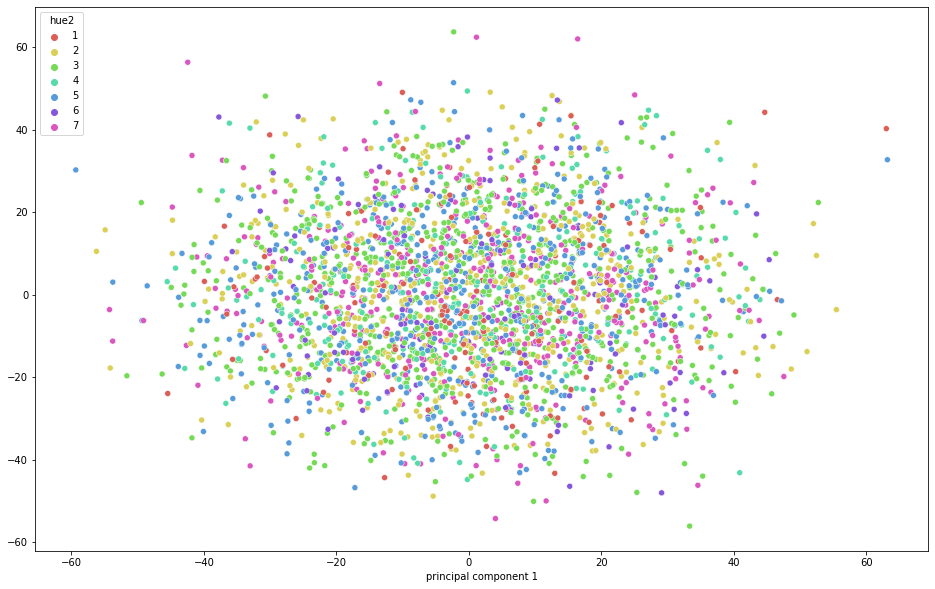

In [34]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1',
    y=principalComponents[:,1],
    palette=sns.color_palette("hls", 7),
    hue = 'hue2',
    data = principal_Df,
    legend="full"
)



---
<br />

## Rank 1 Calculation



### User to User Collaborative Filtering 


In [35]:
test =[54.0,	55.0,	19.0,	14.0,	47.0,	48.0,	15.0,	55.0,	45.0,	43.0]

In [36]:
cols= list(df2.columns.values)

In [37]:
df3 = df2[cols[1:11]]
df3


,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA
0,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0
1,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0
2,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0
3,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0
4,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0
...,...,...,...,...,...,...,...,...,...,...
2939,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0
2940,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0
2941,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0
2942,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0


### Calculating Cosine Similarity of Active Student with past students data

In [38]:
from scipy import spatial

In [39]:
df4 = pd.DataFrame(columns = ['Cosine Similarity']) 
for ind,rows in df3.iterrows():
  a = spatial.distance.cosine(test,rows)
  df4 = df4.append({'Cosine Similarity':a}, ignore_index = True) 
df4 

C:\Users\ajayk\AppData\Local\Temp\ipykernel_8144\2407575245.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append({'Cosine Similarity':a}, ignore_index = True)
C:\Users\ajayk\AppData\Local\Temp\ipykernel_8144\2407575245.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append({'Cosine Similarity':a}, ignore_index = True)
C:\Users\ajayk\AppData\Local\Temp\ipykernel_8144\2407575245.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append({'Cosine Similarity':a}, ignore_index = True)
C:\Users\ajayk\AppData\Local\Temp\ipykernel_8144\2407575245.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = d

,Cosine Similarity
0,0.104051
1,0.055492
2,0.0947
3,0.075419
4,0.107468
...,...
2939,0.106617
2940,0.149634
2941,0.099087
2942,0.130179


In [40]:
df5 = pd.concat([df1,df4],ignore_index=False,axis=1,verify_integrity=False)
df5=df5.sort_values(by=['Cosine Similarity'])
df5

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,...,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV,Cosine Similarity
159,SID20159475,81.0,95.0,44.0,51.0,90.0,96.0,60.0,91.0,94.0,...,78.0,78.2,0,1,0,0,0,0,0,0.019109
997,SID20131754,82.0,84.0,57.0,41.0,98.0,59.0,44.0,83.0,76.0,...,85.0,70.7,1,0,0,0,0,0,0,0.023443
2403,SID20179019,86.0,94.0,49.0,59.0,72.0,93.0,46.0,94.0,61.0,...,78.0,71.3,0,0,0,1,0,0,0,0.024323
224,SID20187237,96.0,100.0,56.0,62.0,87.0,88.0,58.0,95.0,67.0,...,49.0,77.8,0,0,1,0,0,0,0,0.024664
1673,SID20143300,73.0,73.0,53.0,40.0,78.0,72.0,46.0,88.0,64.0,...,63.0,68.3,0,0,0,1,0,0,0,0.026014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,SID20139023,69.0,47.0,100.0,62.0,45.0,22.0,72.0,28.0,86.0,...,55.0,57.3,0,0,0,0,0,0,1,0.221937
2399,SID20174162,26.0,40.0,66.0,100.0,42.0,77.0,90.0,44.0,75.0,...,68.0,63.9,0,0,0,0,0,1,0,0.223938
2632,SID20135449,48.0,84.0,98.0,93.0,27.0,71.0,71.0,24.0,43.0,...,42.0,62.1,0,0,0,0,0,0,1,0.225871
2734,SID20143347,52.0,61.0,93.0,89.0,68.0,45.0,91.0,50.0,42.0,...,40.0,61.4,0,0,0,0,0,0,1,0.226609


### Selecting top 5 percent data similar to student

In [41]:
df6 = pd.DataFrame(columns = ['Cosine Similarity']) 
for ind,rows in df5.iterrows():
  if rows['Cosine Similarity'] <= 0.05:
   df6 = df6.append({'Student_ID': rows['Student_ID'],'Alloted Elective': rows['Alloted Elective'] ,'Marks In Alloted Elective': rows['Marks In Alloted Elective'],'Cosine Similarity':rows['Cosine Similarity']}, ignore_index = True) 
df6

C:\Users\ajayk\AppData\Local\Temp\ipykernel_8144\1101612451.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6 = df6.append({'Student_ID': rows['Student_ID'],'Alloted Elective': rows['Alloted Elective'] ,'Marks In Alloted Elective': rows['Marks In Alloted Elective'],'Cosine Similarity':rows['Cosine Similarity']}, ignore_index = True)
C:\Users\ajayk\AppData\Local\Temp\ipykernel_8144\1101612451.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6 = df6.append({'Student_ID': rows['Student_ID'],'Alloted Elective': rows['Alloted Elective'] ,'Marks In Alloted Elective': rows['Marks In Alloted Elective'],'Cosine Similarity':rows['Cosine Similarity']}, ignore_index = True)
C:\Users\ajayk\AppData\Local\Temp\ipykernel_8144\1101612451.py:4: FutureWarning: The frame.append method is deprecated and will be removed f

,Cosine Similarity,Alloted Elective,Marks In Alloted Elective,Student_ID
0,0.019109,2.0,78.0,SID20159475
1,0.023443,7.0,85.0,SID20131754
2,0.024323,4.0,78.0,SID20179019
3,0.024664,3.0,49.0,SID20187237
4,0.026014,4.0,63.0,SID20143300
...,...,...,...,...
123,0.049676,6.0,69.0,SID20137601
124,0.049685,5.0,45.0,SID20169650
125,0.049759,7.0,54.0,SID20133068
126,0.04979,7.0,81.0,SID20151950


### Calculating Mean for each Elective 

In [42]:
SVV_avg = df6.loc[df6['Alloted Elective']== 1]

CS_avg = df6.loc[df6['Alloted Elective']== 2]

CC_avg = df6.loc[df6['Alloted Elective']== 3]

AR_VR_avg = df6.loc[df6['Alloted Elective']== 4]

ML_avg = df6.loc[df6['Alloted Elective']== 5]

NLP_avg = df6.loc[df6['Alloted Elective']== 6]

IOT_avg = df6.loc[df6['Alloted Elective']== 7]

In [43]:
rank1 = [
 AR_VR_avg['Marks In Alloted Elective'].mean(),
CC_avg['Marks In Alloted Elective'].mean(),
CS_avg['Marks In Alloted Elective'].mean(),
IOT_avg['Marks In Alloted Elective'].mean(),
ML_avg['Marks In Alloted Elective'].mean(),
NLP_avg['Marks In Alloted Elective'].mean(),
SVV_avg['Marks In Alloted Elective'].mean()]

rank1

[70.28571428571429,
 66.06666666666666,
 68.27272727272727,
 63.714285714285715,
 66.15789473684211,
 70.95,
 70.82352941176471]

### Calculating KNN Weighted Average for each elective

In [44]:
SVV_count=0
SVV_sum=0
for i,row in SVV_avg.iterrows():
  SVV_sum = SVV_sum + (1-row['Cosine Similarity'])
  SVV_count = SVV_count + (row['Marks In Alloted Elective'] * (1-row['Cosine Similarity']))
SVV_final = SVV_count/SVV_sum
SVV_final

70.8274132970112

In [45]:
CS_count=0
CS_sum=0
for i,row in CS_avg.iterrows():
  CS_sum = CS_sum + (1-row['Cosine Similarity'])
  CS_count = CS_count + (row['Marks In Alloted Elective'] * (1-row['Cosine Similarity']))
CS_final = CS_count/CS_sum
CS_final

68.27768739898623



---



## Rank 2 Calculation

### Categorization of Data
Estimation of Marks to nearest multiple of 5

In [46]:
for ind,rows in df2.iterrows():   # binning the marks in allocated
    rows['Marks In Alloted Elective'] = rows['Marks In Alloted Elective']-rows['Marks In Alloted Elective']%5 
    df2.loc[ind,'Marks In Alloted Elective'] = rows['Marks In Alloted Elective']

In [47]:
cols= list(df2.columns.values)

### Spiliting of Training and Testing Data

In [48]:
df2


,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,...,A_ML,A_NLP,A_SVV,P_AR_VR,P_CC,P_CS,P_IOT,P_ML,P_NLP,P_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,...,0,0,1,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,...,0,0,0,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,...,0,0,0,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,...,0,0,0,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,...,0,0,1,0,0,0,0,1,0,0
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,...,0,0,1,0,1,0,0,0,0,0
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,...,0,0,1,0,0,1,0,0,0,0
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,...,0,1,0,0,0,0,0,0,1,0


In [49]:
X = df2[cols[20:27] +cols[1:11]]
Y = df2[cols[13:20]]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [50]:
Y_train

,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV
1318,0,0,0,0,1,0,0
2018,0,0,0,0,1,0,0
215,0,0,1,0,0,0,0
2083,1,0,0,0,0,0,0
997,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
763,0,0,1,0,0,0,0
835,0,1,0,0,0,0,0
1653,0,0,0,1,0,0,0
2607,0,0,0,1,0,0,0


In [51]:
X_train

,P_AR_VR,P_CC,P_CS,P_IOT,P_ML,P_NLP,P_SVV,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA
1318,0,0,0,0,1,0,0,74.0,79.0,81.0,92.0,65.0,55.0,84.0,52.0,89.0,43.0
2018,0,0,0,0,1,0,0,55.0,87.0,55.0,47.0,62.0,81.0,79.0,60.0,68.0,78.0
215,0,0,1,0,0,0,0,76.0,67.0,47.0,86.0,77.0,84.0,63.0,93.0,97.0,90.0
2083,1,0,0,0,0,0,0,58.0,53.0,43.0,98.0,43.0,40.0,99.0,54.0,79.0,88.0
997,1,0,0,0,0,0,0,82.0,84.0,57.0,41.0,98.0,59.0,44.0,83.0,76.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,1,0,0,0,0,45.0,81.0,57.0,44.0,98.0,59.0,70.0,96.0,88.0,90.0
835,0,1,0,0,0,0,0,44.0,77.0,93.0,61.0,85.0,63.0,93.0,73.0,72.0,65.0
1653,0,0,1,0,0,0,0,68.0,94.0,40.0,96.0,59.0,89.0,57.0,45.0,85.0,51.0
2607,0,0,0,1,0,0,0,64.0,55.0,56.0,73.0,95.0,56.0,90.0,86.0,83.0,87.0


## Applying Educational Data Mining Techniques

### Applying Decision Tree Classifier

### Applying SVM Classifier

In [62]:
from sklearn import svm
from sklearn import metrics 

In [63]:
df1
cols_SVM= list(df1.columns.values)

In [64]:
df1['Alloted Elective'] = pd.Categorical(pd.factorize(df1['Alloted Elective'])[0] + 1)
df1['Preference Of Elective'] = pd.Categorical(pd.factorize(df1['Preference Of Elective'])[0] + 1)
df1

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,...,Alloted Elective,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,...,1,91.0,88.6,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,...,2,60.0,87.1,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,...,3,90.0,86.9,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,...,4,58.0,67.4,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,...,5,60.0,88.6,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,...,1,71.0,52.0,0,0,0,0,0,0,1
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,...,1,45.0,50.6,0,0,0,0,0,0,1
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,...,1,92.0,50.1,0,0,0,0,0,0,1
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,...,6,84.0,69.4,0,0,0,0,0,1,0


In [65]:
X_SVM = df1[ cols_SVM[1:12]]
Y_SVM = df1[cols_SVM[12]]
X_SVM

,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective
0,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,1
1,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,2
2,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,3
3,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,4
4,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,5
...,...,...,...,...,...,...,...,...,...,...,...
2939,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0,5
2940,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0,2
2941,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0,3
2942,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0,6


In [66]:
Y_SVM

0       1
1       2
2       3
3       4
4       5
       ..
2939    1
2940    1
2941    1
2942    6
2943    6
Name: Alloted Elective, Length: 2944, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

In [67]:
X_SVM_train,X_SVM_test,Y_SVM_train,Y_SVM_test = train_test_split(X_SVM,Y_SVM,test_size=0.2,random_state=0)

### Fitting SVM Model

In [68]:
clf_SVM = svm.SVC(kernel = 'linear', C = 1)
clf_SVM.fit(X_SVM_train, Y_SVM_train)

SVC(C=1, kernel='linear')

In [69]:
y_SVM_pred = clf_SVM.predict(X_SVM_test)
y_SVM_pred

array([5, 2, 3, 1, 3, 4, 1, 4, 2, 7, 6, 4, 5, 6, 5, 3, 7, 3, 1, 6, 6, 3,
       3, 2, 7, 3, 1, 6, 4, 3, 6, 1, 7, 2, 3, 4, 5, 5, 3, 3, 3, 1, 6, 7,
       7, 7, 7, 4, 7, 2, 5, 5, 5, 1, 7, 3, 2, 3, 6, 6, 5, 2, 1, 3, 4, 5,
       3, 1, 3, 4, 5, 2, 6, 5, 1, 5, 1, 4, 2, 5, 4, 1, 3, 1, 6, 1, 5, 6,
       2, 4, 5, 6, 2, 6, 2, 4, 2, 4, 4, 5, 7, 6, 4, 3, 4, 6, 3, 4, 7, 7,
       2, 7, 4, 2, 2, 1, 4, 2, 5, 3, 5, 2, 2, 5, 4, 1, 2, 3, 4, 7, 4, 7,
       4, 5, 7, 4, 7, 7, 3, 4, 3, 2, 5, 6, 3, 4, 2, 5, 1, 1, 7, 1, 1, 3,
       4, 1, 4, 7, 2, 1, 6, 4, 7, 2, 4, 4, 2, 3, 5, 5, 1, 5, 4, 5, 1, 2,
       6, 6, 4, 2, 6, 4, 3, 7, 6, 5, 1, 7, 1, 6, 7, 6, 5, 3, 4, 3, 5, 4,
       3, 2, 3, 2, 7, 1, 5, 5, 4, 2, 2, 3, 2, 1, 5, 7, 3, 6, 4, 1, 7, 4,
       1, 3, 1, 2, 4, 3, 6, 2, 2, 2, 5, 2, 1, 2, 2, 1, 4, 3, 6, 2, 1, 1,
       1, 3, 4, 3, 5, 7, 7, 2, 2, 5, 3, 2, 2, 6, 2, 2, 2, 5, 4, 7, 5, 6,
       2, 2, 1, 3, 5, 4, 1, 6, 6, 7, 2, 7, 6, 3, 1, 1, 2, 1, 2, 1, 5, 1,
       1, 4, 6, 1, 3, 1, 3, 1, 3, 2, 3, 5, 3, 7, 5,

### Visualization of SVM Model

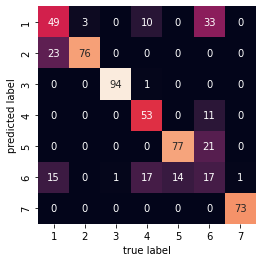

In [70]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_SVM_test, y_SVM_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df11.iloc[:,0].unique(), yticklabels=df11.iloc[:,0].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

### Accuracy of SVM Classifier

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print("Accuracy:",metrics.accuracy_score(Y_SVM_test, y_SVM_pred))

Accuracy: 0.7453310696095077


In [73]:
print(classification_report(Y_SVM_test,y_SVM_pred))


              precision    recall  f1-score   support

           1       0.52      0.56      0.54        87
           2       0.77      0.96      0.85        79
           3       0.99      0.99      0.99        95
           4       0.83      0.65      0.73        81
           5       0.79      0.85      0.81        91
           6       0.26      0.21      0.23        82
           7       1.00      0.99      0.99        74

    accuracy                           0.75       589
   macro avg       0.74      0.74      0.74       589
weighted avg       0.74      0.75      0.74       589



## KNN (k-nearest neighbours) classifier 

In [74]:
from sklearn.neighbors import KNeighborsClassifier 

In [75]:
X_SVM_train

,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective
1318,74.0,79.0,81.0,92.0,65.0,55.0,84.0,52.0,89.0,43.0,5
2018,55.0,87.0,55.0,47.0,62.0,81.0,79.0,60.0,68.0,78.0,5
215,76.0,67.0,47.0,86.0,77.0,84.0,63.0,93.0,97.0,90.0,3
2083,58.0,53.0,43.0,98.0,43.0,40.0,99.0,54.0,79.0,88.0,7
997,82.0,84.0,57.0,41.0,98.0,59.0,44.0,83.0,76.0,83.0,7
...,...,...,...,...,...,...,...,...,...,...,...
763,45.0,81.0,57.0,44.0,98.0,59.0,70.0,96.0,88.0,90.0,3
835,44.0,77.0,93.0,61.0,85.0,63.0,93.0,73.0,72.0,65.0,2
1653,68.0,94.0,40.0,96.0,59.0,89.0,57.0,45.0,85.0,51.0,3
2607,64.0,55.0,56.0,73.0,95.0,56.0,90.0,86.0,83.0,87.0,4


In [76]:
Y_SVM_train

1318    5
2018    5
215     3
2083    7
997     7
       ..
763     3
835     2
1653    4
2607    4
2732    1
Name: Alloted Elective, Length: 2355, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

### Fitting KNN model

In [77]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_SVM_train, Y_SVM_train)

In [78]:
knn_predictions = knn.predict(X_SVM_test)
knn_predictions

array([3, 3, 4, 3, 1, 2, 4, 4, 3, 5, 4, 5, 3, 4, 3, 7, 7, 5, 1, 2, 6, 5,
       5, 3, 7, 6, 6, 5, 5, 5, 4, 1, 1, 2, 6, 2, 3, 4, 7, 5, 7, 7, 5, 6,
       7, 1, 6, 1, 3, 3, 5, 6, 1, 7, 3, 3, 5, 4, 1, 2, 5, 3, 1, 7, 4, 3,
       4, 7, 6, 2, 5, 3, 6, 6, 5, 7, 5, 1, 5, 1, 4, 1, 5, 7, 5, 7, 5, 2,
       4, 4, 3, 1, 3, 1, 2, 6, 7, 7, 3, 6, 4, 4, 2, 6, 5, 1, 3, 2, 1, 6,
       5, 6, 4, 5, 7, 1, 7, 4, 4, 7, 6, 2, 4, 5, 3, 2, 7, 7, 3, 4, 4, 2,
       2, 1, 7, 4, 7, 1, 3, 5, 5, 5, 2, 7, 3, 7, 2, 6, 5, 1, 4, 1, 6, 5,
       7, 1, 4, 2, 3, 7, 6, 7, 2, 6, 7, 1, 2, 2, 7, 6, 4, 2, 3, 5, 4, 5,
       6, 5, 6, 7, 5, 4, 2, 3, 7, 1, 7, 4, 7, 4, 2, 4, 6, 1, 7, 3, 2, 4,
       4, 2, 3, 5, 4, 6, 7, 2, 6, 1, 3, 3, 2, 7, 5, 5, 4, 4, 4, 6, 6, 4,
       6, 2, 2, 5, 3, 2, 3, 4, 2, 5, 5, 2, 1, 4, 5, 1, 4, 6, 7, 6, 4, 6,
       6, 7, 5, 3, 7, 4, 2, 6, 2, 2, 4, 3, 7, 4, 4, 2, 3, 7, 4, 2, 3, 1,
       4, 3, 1, 4, 3, 7, 6, 6, 1, 1, 2, 2, 5, 4, 6, 2, 7, 4, 2, 1, 1, 7,
       4, 6, 1, 4, 2, 7, 7, 3, 5, 5, 4, 3, 7, 3, 7,

### Accuracy of KNN Model

In [79]:
accuracy = knn.score(X_SVM_test, Y_SVM_test) 
accuracy 

0.21052631578947367

In [80]:
print("Accuracy:",metrics.accuracy_score(Y_SVM_test, knn_predictions))

Accuracy: 0.21052631578947367


In [81]:
print(classification_report(Y_SVM_test,knn_predictions))

              precision    recall  f1-score   support

           1       0.33      0.30      0.31        87
           2       0.24      0.28      0.26        79
           3       0.22      0.20      0.21        95
           4       0.22      0.22      0.22        81
           5       0.15      0.14      0.15        91
           6       0.17      0.17      0.17        82
           7       0.14      0.16      0.15        74

    accuracy                           0.21       589
   macro avg       0.21      0.21      0.21       589
weighted avg       0.21      0.21      0.21       589



### Model Visualization of KNN

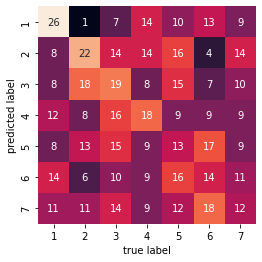

In [82]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_SVM_test, knn_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df11.iloc[:,0].unique(), yticklabels=df11.iloc[:,0].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

## Naive Bayes classifier

In [83]:
from sklearn.naive_bayes import GaussianNB 

In [84]:
gnb = GaussianNB().fit(X_SVM_train, Y_SVM_train) 
gnb_predictions = gnb.predict(X_SVM_test)
gnb_predictions

array([5, 2, 3, 3, 3, 4, 2, 3, 2, 7, 4, 3, 5, 5, 5, 3, 7, 3, 2, 5, 3, 3,
       3, 1, 7, 3, 2, 5, 4, 3, 6, 3, 7, 2, 3, 4, 5, 6, 3, 3, 3, 2, 5, 7,
       7, 7, 7, 3, 7, 2, 6, 6, 5, 3, 7, 3, 2, 3, 6, 4, 6, 1, 4, 3, 4, 5,
       3, 3, 3, 4, 6, 2, 5, 5, 3, 5, 3, 4, 1, 5, 4, 2, 3, 3, 6, 5, 5, 4,
       2, 4, 6, 5, 2, 6, 2, 3, 1, 4, 4, 5, 7, 5, 3, 3, 4, 3, 3, 4, 7, 7,
       2, 7, 3, 2, 2, 3, 4, 2, 5, 3, 5, 2, 2, 6, 4, 1, 2, 3, 3, 7, 4, 7,
       4, 6, 7, 4, 7, 7, 3, 3, 3, 2, 5, 4, 3, 4, 1, 5, 3, 2, 7, 3, 4, 3,
       3, 2, 3, 7, 2, 3, 4, 3, 7, 2, 4, 4, 2, 3, 5, 6, 1, 5, 4, 6, 3, 2,
       5, 5, 3, 2, 4, 3, 3, 7, 5, 5, 3, 7, 3, 5, 7, 5, 5, 3, 4, 3, 5, 3,
       3, 1, 3, 1, 7, 1, 5, 6, 3, 2, 2, 3, 2, 3, 5, 7, 3, 5, 3, 2, 7, 4,
       3, 3, 1, 2, 4, 3, 4, 2, 2, 2, 5, 2, 2, 2, 2, 4, 3, 3, 5, 2, 3, 3,
       2, 3, 3, 3, 5, 7, 7, 2, 2, 5, 3, 2, 2, 5, 2, 2, 2, 5, 3, 7, 6, 5,
       2, 2, 3, 3, 5, 3, 1, 7, 5, 7, 2, 7, 5, 3, 2, 1, 2, 3, 2, 1, 5, 3,
       1, 3, 6, 3, 3, 2, 3, 2, 3, 2, 3, 6, 3, 7, 5,

### Accuracy of Naive Bayes Classifier

In [85]:
accuracy = gnb.score(X_SVM_test, Y_SVM_test)
accuracy

0.7775891341256367

In [86]:
print(classification_report(Y_SVM_test,gnb_predictions))

              precision    recall  f1-score   support

           1       0.94      0.38      0.54        87
           2       0.75      1.00      0.85        79
           3       0.56      1.00      0.71        95
           4       1.00      0.70      0.83        81
           5       0.81      1.00      0.90        91
           6       0.94      0.35      0.51        82
           7       0.96      1.00      0.98        74

    accuracy                           0.78       589
   macro avg       0.85      0.78      0.76       589
weighted avg       0.84      0.78      0.76       589



### Naive Bayes Model Visualization

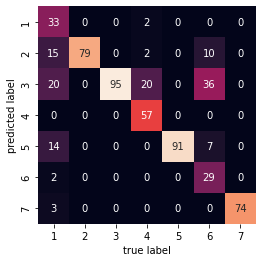

In [87]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_SVM_test, gnb_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df11.iloc[:,0].unique(), yticklabels=df11.iloc[:,0].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

### Prediciting Allotted Elective

In [88]:
testnb = [54.0,	55.0,	19.0,	14.0,	47.0,	48.0,	15.0,	55.0,	45.0,	43.0, 2]
testnb2 = [testnb]

In [89]:
test_pred = gnb.predict(testnb2)
test_pred[0]

C:\Users\ajayk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


1

In [90]:
naivebase=[0]*7
for i in range(1,8):
  if i == test_pred[0]:
    naivebase[i-1] = naivebase[i-1]+100
naivebase

[100, 0, 0, 0, 0, 0, 0]



---

<br />

## Rank 3 Calculation

In [91]:
#Calculating the count of the all Electives
SVV_count = df2.loc[df['Preference Of Elective']== 'SVV' ]

CS_count = df2.loc[df['Preference Of Elective']== 'CS']

CC_count = df2.loc[df['Preference Of Elective']== 'CC']

AR_VR_count = df2.loc[df['Preference Of Elective']== 'AR_VR']

ML_count = df2.loc[df['Preference Of Elective']== 'ML']

NLP_count = df2.loc[df['Preference Of Elective']== 'NLP']

IOT_count = df2.loc[df['Preference Of Elective']== 'IOT']
SVV_count2 = SVV_count.loc[SVV_count['Marks In Alloted Elective'] >= 90]
CS_count2 = CS_count.loc[CS_count['Marks In Alloted Elective'] >= 90]
CC_count2 = CC_count.loc[CC_count['Marks In Alloted Elective'] >= 90]
AR_VR_count2 = AR_VR_count.loc[AR_VR_count['Marks In Alloted Elective'] >= 90]
ML_count2 = ML_count.loc[ML_count['Marks In Alloted Elective'] >= 90]
NLP_count2 = NLP_count.loc[NLP_count['Marks In Alloted Elective'] >= 90]
IOT_count2 = IOT_count.loc[IOT_count['Marks In Alloted Elective'] >= 90]

rank3= [AR_VR_count2['Student_ID'].count()/AR_VR_count['Student_ID'].count(),
         CC_count2['Student_ID'].count()/CC_count['Student_ID'].count(),
CS_count2['Student_ID'].count()/CS_count['Student_ID'].count(),
IOT_count2['Student_ID'].count()/IOT_count['Student_ID'].count(),
ML_count2['Student_ID'].count()/ML_count['Student_ID'].count(),
NLP_count2['Student_ID'].count()/NLP_count['Student_ID'].count(),
SVV_count2['Student_ID'].count()/SVV_count['Student_ID'].count()]

rank3  


[0.19679633867276888,
 0.17003367003367004,
 0.17357512953367876,
 0.16776315789473684,
 0.16173570019723865,
 0.20125786163522014,
 0.2046783625730994]



---

<br />


## Weighted Rank Calculation

In [92]:
rank1f = [x * 0.7 for x in rank1]
rank1f

[49.2,
 46.24666666666666,
 47.79090909090908,
 44.6,
 46.310526315789474,
 49.665,
 49.576470588235296]

In [93]:
rank2 = [x * 0.05 for x in naivebase]
rank2

[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [94]:
rank3f = [x * 25 for x in rank3]
rank3f

[4.919908466819222,
 4.250841750841751,
 4.339378238341969,
 4.194078947368421,
 4.043392504930966,
 5.031446540880504,
 5.116959064327485]

In [95]:
WR = [] 
for i in range(0, len(rank1f)): 
    WR.append(rank1f[i] + rank2[i]+ rank3f[i]) 
WR

[59.119908466819226,
 50.49750841750841,
 52.130287329251054,
 48.79407894736842,
 50.35391882072044,
 54.6964465408805,
 54.693429652562784]

In [96]:
dict = {'Electives':['AR_VR', 'CC', 'CS', 'IOT','ML','NLP','SVV'],  
       } 
df9 = pd.DataFrame(WR)
df7 = pd.DataFrame(dict)
df8 = pd.concat([df7,df9],ignore_index=False,axis=1,verify_integrity=False)
df8


,Electives,0
0,AR_VR,59.119908
1,CC,50.497508
2,CS,52.130287
3,IOT,48.794079
4,ML,50.353919
5,NLP,54.696447
6,SVV,54.693430


## Final Order of Electives for Student

In [97]:
df10=df8.sort_values(by=0, ascending=False)
df10

,Electives,0
0,AR_VR,59.119908
5,NLP,54.696447
6,SVV,54.693430
2,CS,52.130287
1,CC,50.497508
4,ML,50.353919
3,IOT,48.794079
